<a href="https://colab.research.google.com/github/adammoss/MLiS2/blob/master/intro/optimiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Rosenbrock function is a non-convex function commonly used for bench-marking optimisation methods. It is given by

$
f(x, y) = \left( 1 - x \right)^2 + 100 \left( y - x^2 \right)^2
$

and has a global minima at $(x, y) = (1, 1)$. 

In this example we will benchmark several of the optimisers included with TensorFlow, including SGD, SGD + momentum, RMSprop and Adam, starting from (x, y) = (0, 1). Learning rates were chosen to be (approximately) the largest values possible and that converged to the true solution. 

In [0]:

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [303]:
print(tf.__version__)

2.1.0-rc1


In [0]:
def reset():	
	x1 = tf.Variable(0.0) 
	x2 = tf.Variable(1.0) 
	return x1, x2

In [0]:
def rosenbrock(x, y): 
	return (1 - x)**2 + 100 * (y - x**2)**2

In [0]:
def benchmark(f, opt, iterations):
  x, y = reset()
  history = []
  for i in range(iterations):
    with tf.GradientTape() as tape:
      z = f(x, y)
    grads = tape.gradient(z, [x, y])
    processed_grads = [g for g in grads]
    grads_and_vars = zip(processed_grads, [x, y])
    opt.apply_gradients(grads_and_vars)
    history.append([x.numpy(), y.numpy(), grads[0].numpy(), grads[1].numpy()])
  return np.array(history)

In [0]:
iterations = 100

In [0]:
sgd_history = benchmark(rosenbrock, keras.optimizers.SGD(learning_rate=0.001), iterations)

In [0]:
momentum_history = benchmark(rosenbrock, keras.optimizers.SGD(learning_rate=0.001, nesterov=True, momentum=0.2), iterations)

In [0]:
rmsprop_history = benchmark(rosenbrock, keras.optimizers.RMSprop(learning_rate=0.01), iterations)

In [0]:
adam_history = benchmark(rosenbrock, keras.optimizers.Adam(learning_rate=0.05), iterations)

In [0]:
xx, yy = np.mgrid[-1:2:.01, -0.5:2:.01]
zz = rosenbrock(xx, yy)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


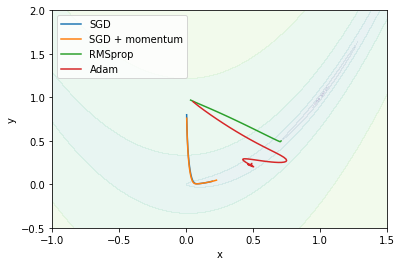

In [313]:
plt.figure()
plt.contourf(xx, yy, np.log(zz), alpha=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(sgd_history[:, 0], sgd_history[:, 1], label='SGD')
plt.plot(momentum_history[:, 0], momentum_history[:, 1], label='SGD + momentum')
plt.plot(rmsprop_history[:, 0], rmsprop_history[:, 1], label='RMSprop')
plt.plot(adam_history[:, 0], adam_history[:, 1], label='Adam')
plt.xlim([-1,1.5])
plt.ylim([-0.5,2])
plt.legend(loc='upper left')
plt.show()

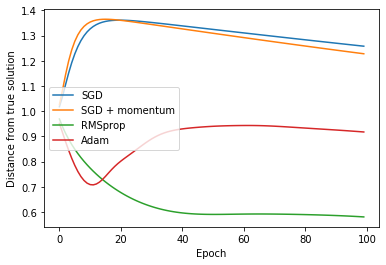

In [314]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Distance from true solution')
plt.plot(((sgd_history[:, 0] - 1)**2 + (sgd_history[:, 1] - 1)**2)**0.5, label = 'SGD')
plt.plot(((momentum_history[:, 0] - 1)**2 + (momentum_history[:, 1] - 1)**2)**0.5, label = 'SGD + momentum')
plt.plot(((rmsprop_history[:, 0] - 1)**2 + (rmsprop_history[:, 1] - 1)**2)**0.5, label = 'RMSprop')
plt.plot(((adam_history[:, 0] - 1)**2 + (adam_history[:, 1] - 1)**2)**0.5, label = 'Adam')
plt.legend()
plt.show()